**COORDINATE REFERENCE SYSTEM EXERCISE**

In [2]:
import pandas as pd
birds_df = pd.read_csv('purple_martin.csv', parse_dates=['timestamp'])
birds_df.head()

,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


In [4]:
import geopandas as gpd
birds = gpd.GeoDataFrame(birds_df, crs="EPSG:4326", 
                         geometry=gpd.points_from_xy(birds_df['location-long'], birds_df['location-lat']))
birds.head()

,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.24350 13.09578)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77683 -11.72390)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.24154 -11.61224)


<Axes: >

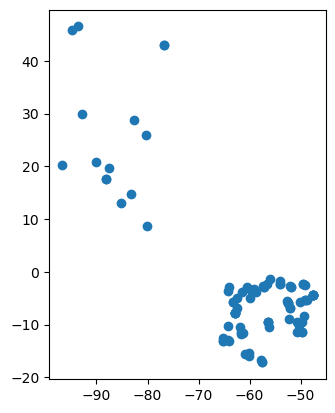

In [9]:
birds.plot()

In [5]:
world =gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]
americas.head()

/var/folders/ss/8t40j75527v3c6rlj37_lltc0000gn/T/ipykernel_4803/2439484882.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world =gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,11263077.0,North America,Haiti,HTI,14332,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


<Axes: >

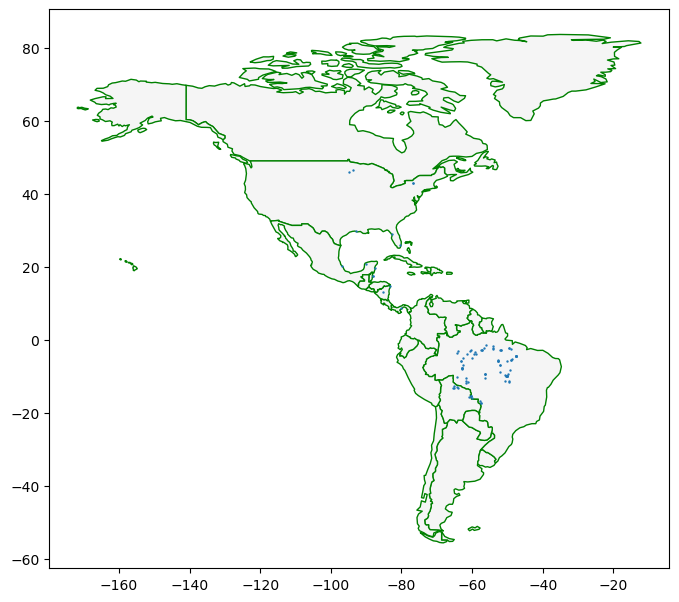

In [8]:
ax = americas.plot(figsize=(8,8), color='whitesmoke', linestyle='-', edgecolor='green')
birds.plot(ax=ax, markersize=0.5)

In [12]:
from shapely.geometry import LineString
path_df = birds.groupby('tag-local-identifier')['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init': 'epsg:4326'}

start_df = birds.groupby('tag-local-identifier')['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init': 'epsg:4326'}

start_gdf.head()

/Users/asaucedov/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/asaucedov/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)


In [13]:
end_df = birds.groupby('tag-local-identifier')['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init': 'epsg:4326'}

/Users/asaucedov/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

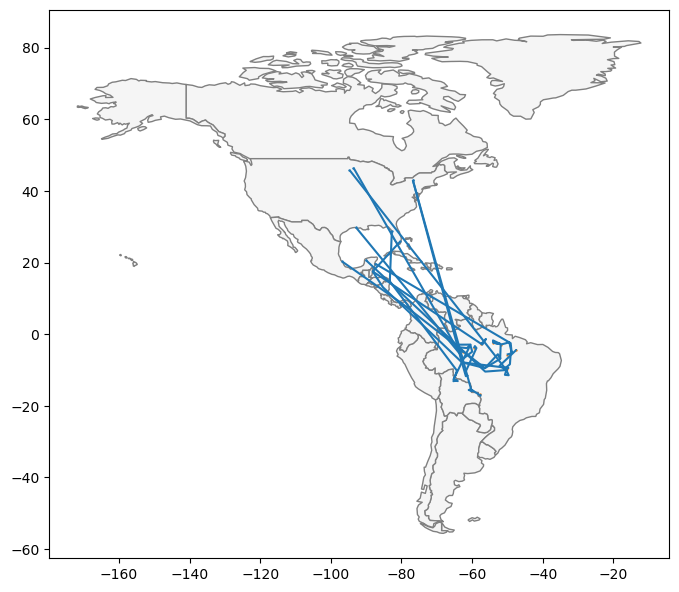

In [14]:
ax = americas.plot(figsize=(8,8), color='whitesmoke', linestyle='-', edgecolor='gray')
path_gdf.plot(ax=ax, markersize=0.5)
start_gdf.plot(ax=ax, markersize=0.5)
end_gdf.plot(ax=ax, markersize=0.5)

In [17]:
protected_areas = gpd.read_file('./SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp')
protected_areas.crs = {'init': 'epsg:4326'}

/Users/asaucedov/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


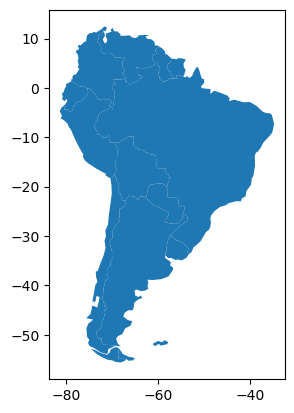

In [25]:
south_america = americas.loc[americas['continent']=='South America']
ax = south_america.plot()

In [26]:
# calculate total area of South America (in square kilometers)
totalArea = sum(south_america.geometry.to_crs(epsg=3035).area) / 10**6
totalArea

17759005.815061226